In [1]:
import csv
import pickle
import datetime
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

In [3]:
def import_data():
    df = pd.read_csv('data/final_df2.csv')
    df = df.iloc[:,1:]
    
    return df

In [4]:
def fulldf(df):
    
    df.snowfall = df.snowfall.replace(["T","  T"],0.05)
    df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
    df.depart = pd.to_numeric(df.depart, errors='coerce')
    
    df = type_change_numeric(df,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir' ])
    df['date'] = pd.to_datetime(df['date'])
                                   
    
    df["day_of_year"] = df['date'].dt.dayofyear
    df["year"] = df['date'].dt.year
    df["month"] = df["date"].dt.month
    
    
    for idx in range(5, 8):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)

    for idx in range(16, 23):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)
    add_depart1(df)
    
    return df

# for column in item37.columns:
#     item37[column].interpolate()

In [5]:
def type_change_numeric(df, ls = []): 
    #ls에 있는 column name은 numeric형으로 바꾸지 않는다.
    cols = df.columns
    for i in cols:
        if i in ls:
            #df = df.replace(["M",None], '')
            df.snowfall = df.snowfall.replace(["T","  T"],0.05)
            df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
            df[i] = pd.to_numeric(df[i], errors='coerce')
        
    return df

In [6]:
def add_depart1(x):
    x.depart.fillna(x.tavg - x.groupby(["day_of_year","store_nbr"])["tavg"].transform('mean'),inplace = True)
    x.depart = x.depart.round(2)
    return x.sort_values(["store_nbr","date","item_nbr"])

In [7]:
def reorder_df(df):
    #Column 정렬 (y값을 마지막으로 ) 후 FG+ -> FG2 변환 (formula에 인식시키기위해 )
    new_order =  ['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',  'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'day_of_year', 'year', 'month', 'units' ]
    df = df[new_order]
    df.columns = ['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'day_of_year', 'year', 'month', 'units' ]
    
    return df

In [8]:
def add_cat_columns(df):
    df['date'] = pd.to_datetime(df['date'])
#     df['sunrise'] = pd.to_datetime(df['sunrise'], format='%H%M')
#     df['sunset'] = pd.to_datetime(df['sunset'], format='%H%M')

    blackfriday = ["2012-11-21","2012-11-22","2012-11-23", "2012-11-24","2012-11-25",
              "2013-11-27","2013-11-28", "2013-11-29","2013-11-30","2013-11-31",
              "2014-11-26", "2014-11-27", "2014-11-28","2014-11-29","2014-11-30"]
    df["week_day_name"] = df['date'].dt.weekday_name
    df['is_week'] = False
    df.is_week[df['week_day_name'] == 'Sunday'] = True
    df.is_week[df['week_day_name'] == 'Saturday'] = True
    df.is_week[df['week_day_name'] == 'Friday'] = True
    df["is_blackfriday"] = df.date.apply(lambda x : str(x)[:10] in blackfriday).astype(int)
    
    holiday = ["2012-01-02","2012-01-16","2012-02-14", "2012-02-20",\
                                   "2012-05-28","2012-07-04","2012-09-03", "2012-10-08",\
                                   "2012-11-12", "2012-12-24","2012-12-25", "2012-12-31",\
                                   "2013-01-01","2013-01-21", "2013-02-14",\
                                   "2013-05-27", "2013-07-04", "2013-09-02",  \
                                    "2013-11-24", "2013-11-25","2013-12-24",  "2013-12-31",\
                                   "2014-01-01", "2014-01-20", "2014-02-14",\
                                   "2014-05-26", "2014-07-04", "2014-09-01", "2014-10-13",\
                                   "2014-11-11", "2014-12-24", "2014-12-25", "2014-12-31"]
    
    df["is_holiday"] = df.date.apply(lambda x : str(x)[:10] in holiday).astype(int)
    
    df['hardrain'] = [(((4 if i > 8 else 3) if i > 6 else 2) if i > 1 else 1) if i > 0 else 0 for i in df['preciptotal']]
    # rain 1 snow 2
    # 득정조건열 추가 ()
    df['hardsnow'] = [(( 3 if i > 3.5 else 2) if i > 1 else 1) if i > 0 else 0 for i in df['snowfall']]
    
    df['log_units'] = df.units.apply(lambda x: np.log(x + 1)).astype(float)
    return df

In [9]:
def df_sampling(df):
    new_order = ['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed',
       'resultspeed', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS',
       'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ', 'MI', 'PR',
       'BC', 'BL', 'VC', 'day_of_year', 'year', 'month', 
       'week_day_name', 'is_week', 'is_holiday', 'is_blackfriday', 'hardrain', 'hardsnow',
       'log_units', 'units' ]
    
    df = df[new_order]
    
    X, y = df.iloc[:,:-1], df.units
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)
    
    train = pd.concat([X_train, y_train] ,axis = 1)
    train = train.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)
    X_test = X_test.sort_index()
    y_train = y_train.sort_index()
    y_test = y_test.sort_index()
    
    return train, y_train,  X_test ,y_test
   

In [10]:
data = import_data()
data_t = fulldf(data)
data_t = reorder_df(data_t)
data_t = add_cat_columns(data_t)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [11]:
del data_t['snowfall']
data_t = data_t.dropna()

In [12]:
train0, y_train, X_test, y_test = df_sampling(data_t)
train = sm.add_constant(train0)

In [ ]:
results_OLS_stormy

In [ ]:
params

In [181]:
len(results_OLS.params.values)

148

In [184]:
results_OLS_stormy.params.values = np.array(range(1,149))

AttributeError: can't set attribute

In [76]:
train.columns

Index(['const', 'date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal',
       'stnpressure', 'sealevel', 'avgspeed', 'resultspeed', 'TS', 'GR', 'RA',
       'DZ', 'SN', 'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU',
       'SQ', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC', 'day_of_year', 'year',
       'month', 'week_day_name', 'is_week', 'is_holiday', 'is_blackfriday',
       'hardrain', 'hardsnow', 'log_units', 'units'],
      dtype='object')

In [ ]:
model_OLS_stormy = sm.OLS.from_formula('log_units ~ C(item_nbr)+C(store_nbr) + C(is_week) + C(is_holiday) + C(is_blackfriday) + C(0', data = train)
results_OLS = model_OLS.fit()
print(results_OLS.summary())

In [ ]:
sns.jointplot(results_OLS.predict(X_test), np.log(y_test + 1))
plt.show()

In [14]:

# hat = influence.hat_matrix_diag

# plt.stem(hat)
# plt.show()

In [ ]:

sm.graphics.influence_plot(results_OLS, plot_alpha=0.3)
plt.show()

In [16]:
influence = results_OLS.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

In [54]:
X_new.columns

Index(['const', 'date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal',
       'stnpressure', 'sealevel', 'avgspeed', 'resultspeed', 'TS', 'GR', 'RA',
       'DZ', 'SN', 'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU',
       'SQ', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC', 'day_of_year', 'year',
       'month', 'week_day_name', 'is_week', 'is_holiday', 'is_blackfriday',
       'hardrain', 'hardsnow', 'log_units', 'units'],
      dtype='object')

In [ ]:
def remove_outlier(df, idx):
    idx_t = list(set(df.index)  - set(idx))
    X_new = df.T[idx_t].T

    X_new.const = X_new.const.astype(int)
    X_new['date'] = pd.to_datetime(X_new['date'])
    X_new["day_of_year"] = X_new['date'].dt.dayofyear
    X_new["year"] = X_new['date'].dt.year
    X_new["month"] = X_new["date"].dt.month
    X_new.store_nbr = X_new.store_nbr.astype(int)
    X_new.staion_nbr = X_new.staion_nbr.astype(int)
    X_new.tmax = X_new.tmax.astype(float)
    X_new.tmin = X_new.tmax.astype(float)
    X_new.tavg = X_new.tmax.astype(float)

    numeric_columns = ['const','store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin', \
           'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', \
           'stnpressure', 'sealevel', 'avgspeed', 'resultspeed',  'day_of_year', 'year', \
           'month', 'week_day_name', 'is_week', 'is_holiday', 'is_blackfriday', \
           'hardrain', 'hardsnow', 'log_units', 'units']
    boo_columns = ['TS', 'GR', 'RA', \
           'DZ', 'SN', 'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', \
           'SQ', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC',]

    for col in numeric_columns:
        X_new[col] = pd.to_numeric(X_new[col], errors='coerce')

    for col in boo_columns:
        X_new[col] = X_new[col].astype(bool)

    blackfriday = ["2012-11-21","2012-11-22","2012-11-23", "2012-11-24","2012-11-25",
                  "2013-11-27","2013-11-28", "2013-11-29","2013-11-30","2013-11-31",
                  "2014-11-26", "2014-11-27", "2014-11-28","2014-11-29","2014-11-30"]

    X_new["week_day_name"] = X_new['date'].dt.weekday_name
    X_new['is_week'] = False
    X_new.is_week[X_new['week_day_name'] == 'Sunday'] = True
    X_new.is_week[X_new['week_day_name'] == 'Saturday'] = True
    X_new.is_week[X_new['week_day_name'] == 'Friday'] = True
    X_new["is_blackfriday"] = X_new.date.apply(lambda x : str(x)[:10] in blackfriday).astype(int)

    holiday = ["2012-01-02","2012-01-16","2012-02-14", "2012-02-20",\
                                   "2012-05-28","2012-07-04","2012-09-03", "2012-10-08",\
                                   "2012-11-12", "2012-12-24","2012-12-25", "2012-12-31",\
                                   "2013-01-01","2013-01-21", "2013-02-14",\
                                   "2013-05-27", "2013-07-04", "2013-09-02",  \
                                    "2013-11-24", "2013-11-25","2013-12-24",  "2013-12-31",\
                                   "2014-01-01", "2014-01-20", "2014-02-14",\
                                   "2014-05-26", "2014-07-04", "2014-09-01", "2014-10-13",\
                                   "2014-11-11", "2014-12-24", "2014-12-25", "2014-12-31"]

    X_new["is_holiday"] = X_new.date.apply(lambda x : str(x)[:10] in holiday).astype(int)

    X_new['hardrain'] = [(((4 if i > 8 else 3) if i > 6 else 2) if i > 1 else 1) if i > 0 else 0 for i in X_new['preciptotal']]
    # rain 1 snow 2
    # 득정조건열 추가 ()
    X_new['log_units'] = X_new.units.apply(lambda x: np.log(x + 1)).astype(float)
    
    return X_new

In [57]:


X_new.dtypes

In [60]:
X_new.columns

Index(['const', 'date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal',
       'stnpressure', 'sealevel', 'avgspeed', 'resultspeed', 'TS', 'GR', 'RA',
       'DZ', 'SN', 'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU',
       'SQ', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC', 'day_of_year', 'year',
       'month', 'week_day_name', 'is_week', 'is_holiday', 'is_blackfriday',
       'hardrain', 'hardsnow', 'log_units', 'units'],
      dtype='object')

In [102]:
model_OLS2 = sm.OLS.from_formula('log_units ~ C(item_nbr)+C(store_nbr) + C(is_week) + C(is_holiday) + C(FG2) + C(is_blackfriday) + 0', data = X_new)
results_OLS2 = model_OLS2.fit()
print(results_OLS2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     8127.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:03:37   Log-Likelihood:            -1.0936e+05
No. Observations:              129143   AIC:                         2.190e+05
Df Residuals:                  128995   BIC:                         2.205e+05
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(item_nbr)[1]             0

In [140]:
X_new[X_new.hardrain > 2]

,const,date,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,year,month,week_day_name,is_week,is_holiday,is_blackfriday,hardrain,hardsnow,log_units,units
24984,1,2012-06-25,5,16,12,84.0,74.0,79.0,-3.79,74.0,...,2012,6,Monday,False,0,0,3,0,3.295837,26.0
24985,1,2012-06-25,5,20,12,84.0,74.0,79.0,-3.79,74.0,...,2012,6,Monday,False,0,0,3,0,0.000000,0.0
24986,1,2012-06-25,5,93,12,84.0,74.0,79.0,-3.79,74.0,...,2012,6,Monday,False,0,0,3,0,2.302585,9.0
24998,1,2012-06-25,10,5,12,84.0,74.0,79.0,-3.42,74.0,...,2012,6,Monday,False,0,0,3,0,4.158883,63.0
24999,1,2012-06-25,10,21,12,84.0,74.0,79.0,-3.42,74.0,...,2012,6,Monday,False,0,0,3,0,0.693147,1.0
25000,1,2012-06-25,10,37,12,84.0,74.0,79.0,-3.42,74.0,...,2012,6,Monday,False,0,0,3,0,3.295837,26.0
25005,1,2012-06-25,12,86,11,85.0,73.0,79.0,-2.00,74.0,...,2012,6,Monday,False,0,0,3,0,0.000000,0.0
25087,1,2012-06-25,41,61,12,84.0,74.0,79.0,-3.93,74.0,...,2012,6,Monday,False,0,0,3,0,0.000000,0.0
25088,1,2012-06-25,41,68,12,84.0,74.0,79.0,-3.93,74.0,...,2012,6,Monday,False,0,0,3,0,3.401197,29.0
25089,1,2012-06-25,41,93,12,84.0,74.0,79.0,-3.93,74.0,...,2012,6,Monday,False,0,0,3,0,1.945910,6.0


In [137]:
model_OLS3 = sm.OLS.from_formula('log_units ~ C(item_nbr) + C(store_nbr) + scale(preciptotal) ++ C(is_week) + C(is_holiday) +  + C(TS)  + C(DZ) + C(PL) + C(HZ) + C(FU) + C(FZ) + C(is_blackfriday) +C(hardrain) + C(hardsnow) + 0', data = X_new)
results_OLS3 = model_OLS3.fit()
print(results_OLS3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     7523.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:28:33   Log-Likelihood:            -1.0928e+05
No. Observations:              129143   AIC:                         2.189e+05
Df Residuals:                  128983   BIC:                         2.204e+05
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(item_nbr)[1]             0

In [ ]:
data_T

In [115]:
data2 = import_data()
data_t2 = fulldf(data2)
data_t2 = reorder_df(data_t2)
data_t2 = add_cat_columns(data_t2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [118]:
data_t2.columns

Index(['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'avgspeed', 'resultspeed',
       'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP',
       'HZ', 'FU', 'DU', 'SQ', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC',
       'day_of_year', 'year', 'month', 'units', 'week_day_name', 'is_week',
       'is_blackfriday', 'is_holiday', 'hardrain', 'hardsnow', 'log_units'],
      dtype='object')

In [119]:
data_t2.isnull().any()

date              False
store_nbr         False
item_nbr          False
station_nbr       False
tmax               True
tmin               True
tavg               True
depart             True
dewpoint           True
wetbulb            True
heat               True
cool               True
snowfall           True
preciptotal        True
stnpressure        True
sealevel           True
avgspeed           True
resultspeed        True
TS                False
GR                False
RA                False
DZ                False
SN                False
SG                False
GS                False
PL                False
FG2               False
FG                False
BR                False
UP                False
HZ                False
FU                False
DU                False
SQ                False
FZ                False
MI                False
PR                False
BC                False
BL                False
VC                False
day_of_year       False
year            

In [117]:
results_OLS3.predict(data_t2)

PatsyError: Error converting data to categorical: observation with value 103 does not match any of the expected levels (expected: [1, 2, ..., 109, 110])
    log_units ~ C(item_nbr) + C(store_nbr) + scale(preciptotal) ++ C(is_week) + C(is_holiday) +  + C(TS)  + C(DZ) + C(PL) + C(HZ) + C(FU) + C(FZ) + C(is_blackfriday) +C(hardrain) + C(hardsnow) + 0
                ^^^^^^^^^^^

In [ ]:
plt.scatter(X.)

In [ ]:
influence.

In [91]:
data_t = fulldf(data)

In [81]:
len()

In [92]:
data_t = fulldf(data)
data_t = reorder_df(data_t)
data_t = add_cat_columns(data_t)
data_t = data_t.dropna()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [93]:
data_t.dtypes

date              datetime64[ns]
store_nbr                  int64
item_nbr                   int64
station_nbr                int64
tmax                     float64
tmin                     float64
tavg                     float64
depart                   float64
dewpoint                 float64
wetbulb                  float64
heat                     float64
cool                     float64
snowfall                 float64
preciptotal              float64
stnpressure              float64
sealevel                 float64
avgspeed                 float64
resultspeed              float64
TS                         int64
GR                         int64
RA                         int64
DZ                         int64
SN                         int64
SG                         int64
GS                         int64
PL                         int64
FG2                        int64
FG                         int64
BR                         int64
UP                         int64
HZ        

In [99]:
model_OLS_stormy = sm.OLS.from_formula('log_units ~ C(item_nbr) + C(store_nbr) + scale(preciptotal) +  C(FZ) + C(is_blackfriday) +C(hardrain) + C(hardsnow) + 0', data = data_t)
results_OLS_stormy = model_OLS_stormy.fit()
print(results_OLS_stormy.summary())



                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2232.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:00:31   Log-Likelihood:            -1.7587e+05
No. Observations:              122254   AIC:                         3.520e+05
Df Residuals:                  122128   BIC:                         3.532e+05
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(item_nbr)[1]             0

In [ ]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

In [105]:
model_OLS4 = sm.OLS.from_formula('log_units ~ C(item_nbr)+C(store_nbr) + C(is_week) + C(is_holiday) + C(FG2) + C(is_blackfriday) + 0', data = X_test)
results_OLS4 = model_OLS4.fit()
print(results_OLS4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     1015.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:15:29   Log-Likelihood:                -80584.
No. Observations:               58767   AIC:                         1.615e+05
Df Residuals:                   58619   BIC:                         1.628e+05
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(item_nbr)[1]             0

In [106]:
influence2 = results_OLS4.get_influence()
cooks_d2, pvals = influence2.cooks_distance
fox_cr = 4 / (len(y_test) - 2)
idx2 = np.where(cooks_d2 > fox_cr)[0]

In [107]:
len(X_new), len()

array([    9,    14,    28, ..., 58513, 58645, 58646], dtype=int64)

In [123]:
influence3 = results_OLS4.get_influence()
hat = influence3.hat_matrix_diag

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


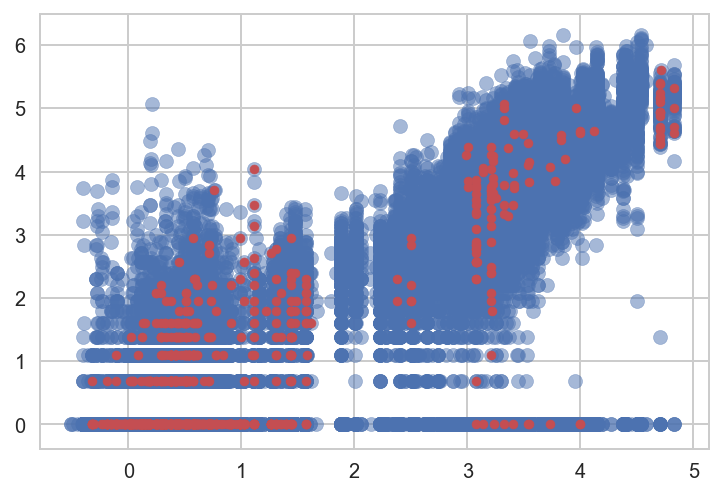

In [122]:
X0 = results_OLS4.predict(X_test).reindex()
y0 = np.log(y_test + 1).reindex()
plt.scatter(X0, y0 , alpha=0.5)
plt.scatter(X0[idx2], y0[idx2], s=20, c="r")

In [127]:
results_OLS4.params

C(item_nbr)[1]            0.365163
C(item_nbr)[2]            0.487556
C(item_nbr)[3]            0.187328
C(item_nbr)[4]            0.851108
C(item_nbr)[5]            3.179816
C(item_nbr)[6]            2.228254
C(item_nbr)[7]           -0.006934
C(item_nbr)[8]            2.951406
C(item_nbr)[9]            3.080115
C(item_nbr)[10]           0.108405
C(item_nbr)[11]           0.052855
C(item_nbr)[12]          -0.320706
C(item_nbr)[13]          -0.211019
C(item_nbr)[14]          -0.122005
C(item_nbr)[15]           0.294120
C(item_nbr)[16]           2.720564
C(item_nbr)[17]          -0.064089
C(item_nbr)[18]           0.119572
C(item_nbr)[19]           0.115213
C(item_nbr)[20]           0.506670
C(item_nbr)[21]           0.305681
C(item_nbr)[22]           1.056710
C(item_nbr)[23]           2.283342
C(item_nbr)[25]           3.307841
C(item_nbr)[26]           1.832146
C(item_nbr)[27]           1.296589
C(item_nbr)[28]           1.439789
C(item_nbr)[30]           0.422897
C(item_nbr)[31]     

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


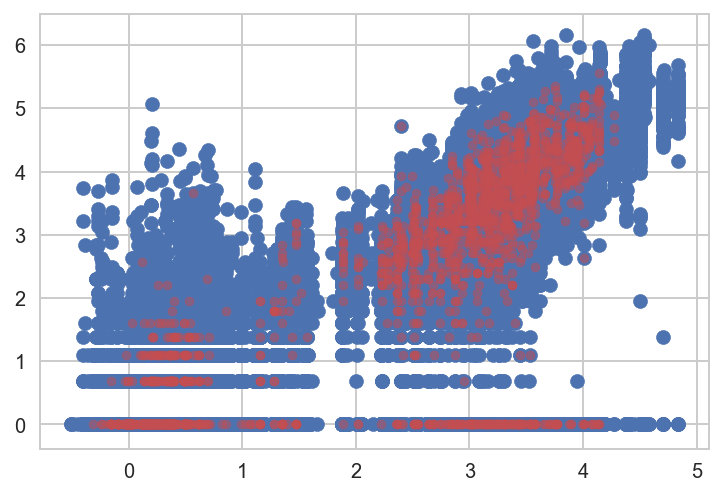

In [128]:
ax = plt.subplot()
plt.scatter(X0, y0)
idx_n = hat > 0.05
plt.scatter(X0[idx], y0[idx], s=20, c="r", alpha=0.5)
plt.show()

In [149]:
full_frame = pd.read_csv('data/data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,7,8,10,12,13,14,15,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
del full_frame['Unnamed: 0']

In [168]:
len(full_frame)

262206

In [154]:
full_frame.snowfall = full_frame.snowfall.replace(["T","  T"],0.05)
full_frame.preciptotal = full_frame.preciptotal.replace(["T","  T"],0.005)
full_frame.snowfall = full_frame.snowfall.replace(["M","  M"], 0)
full_frame.preciptotal = full_frame.preciptotal.replace(["M","  M"], 0)

In [155]:
ls = ['store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',  \
           'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', \
           'stnpressure', 'sealevel', 'avgspeed', 'resultspeed', 'units' ] 

In [156]:
cols = full_frame.columns
for i in cols:
    if i in ls:
        #df = df.replace(["M",None], '')
#         full_frame.snowfall = full_frame.snowfall.replace(["T","  T"],0.05)
#         full_frame.preciptotal = full_frame.preciptotal.replace(["T","  T"],0.005)
        full_frame[i] = pd.to_numeric(full_frame[i], errors='coerce')

In [157]:
full_frame['snowfall'] = pd.to_numeric(full_frame['snowfall'], errors='coerce')

In [158]:
full_frame.dtypes

date            object
store_nbr        int64
item_nbr         int64
units          float64
station_nbr      int64
tmax           float64
tmin           float64
tavg           float64
depart         float64
dewpoint       float64
wetbulb        float64
heat           float64
cool           float64
sunrise         object
sunset          object
snowfall       float64
preciptotal    float64
stnpressure    float64
sealevel       float64
avgspeed       float64
resultspeed    float64
resultdir       object
TS                bool
GR                bool
RA                bool
DZ                bool
SN                bool
SG                bool
GS                bool
PL                bool
FG+               bool
FG                bool
BR                bool
UP                bool
HZ                bool
FU                bool
DU                bool
SQ                bool
FZ                bool
MI                bool
PR                bool
BC                bool
BL                bool
VC         

In [159]:
full_frame.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,HZ,FU,DU,SQ,FZ,MI,PR,BC,BL,VC
0,2012-01-01,1,9,29.0,1,52.0,31.0,42.0,NaN,36.0,...,False,False,False,False,True,False,False,False,False,False
1,2012-01-01,1,28,2.0,1,52.0,31.0,42.0,NaN,36.0,...,False,False,False,False,True,False,False,False,False,False
2,2012-01-01,1,40,0.0,1,52.0,31.0,42.0,NaN,36.0,...,False,False,False,False,True,False,False,False,False,False
3,2012-01-01,1,47,0.0,1,52.0,31.0,42.0,NaN,36.0,...,False,False,False,False,True,False,False,False,False,False
4,2012-01-01,1,51,1.0,1,52.0,31.0,42.0,NaN,36.0,...,False,False,False,False,True,False,False,False,False,False


In [160]:
full_frame['date'] = pd.to_datetime(full_frame['date'])
full_frame["day_of_year"] = full_frame['date'].dt.dayofyear
full_frame["year"] = full_frame['date'].dt.year
full_frame["month"] = full_frame["date"].dt.month

In [163]:
blackfriday = ["2012-11-21","2012-11-22","2012-11-23", "2012-11-24","2012-11-25",
          "2013-11-27","2013-11-28", "2013-11-29","2013-11-30","2013-11-31",
          "2014-11-26", "2014-11-27", "2014-11-28","2014-11-29","2014-11-30"]
full_frame["week_day_name"] = full_frame['date'].dt.weekday_name
full_frame['is_week'] = False
full_frame.is_week[full_frame['week_day_name'] == 'Sunday'] = True
full_frame.is_week[full_frame['week_day_name'] == 'Saturday'] = True
full_frame.is_week[full_frame['week_day_name'] == 'Friday'] = True
full_frame["is_blackfriday"] = full_frame.date.apply(lambda x : str(x)[:10] in blackfriday).astype(int)

holiday = ["2012-01-02","2012-01-16","2012-02-14", "2012-02-20",\
                               "2012-05-28","2012-07-04","2012-09-03", "2012-10-08",\
                               "2012-11-12", "2012-12-24","2012-12-25", "2012-12-31",\
                               "2013-01-01","2013-01-21", "2013-02-14",\
                               "2013-05-27", "2013-07-04", "2013-09-02",  \
                                "2013-11-24", "2013-11-25","2013-12-24",  "2013-12-31",\
                               "2014-01-01", "2014-01-20", "2014-02-14",\
                               "2014-05-26", "2014-07-04", "2014-09-01", "2014-10-13",\
                               "2014-11-11", "2014-12-24", "2014-12-25", "2014-12-31"]

full_frame["is_holiday"] = full_frame.date.apply(lambda x : str(x)[:10] in holiday).astype(int)

full_frame['hardrain'] = [(((4 if i > 8 else 3) if i > 6 else 2) if i > 1 else 1) if i > 0 else 0 for i in full_frame['preciptotal']]
# rain 1 snow 2
# 득정조건열 추가 ()
full_frame['hardsnow'] = [(( 3 if i > 3.5 else 2) if i > 1 else 1) if i > 0 else 0 for i in full_frame['snowfall']]

full_frame['log_units'] = full_frame.units.apply(lambda x: np.log(x + 1)).astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [175]:
full_frame.preciptotal.max()

7.36

In [170]:
full_frame.iloc[0,:]

date              2012-01-01 00:00:00
store_nbr                           1
item_nbr                            9
units                              29
station_nbr                         1
tmax                               52
tmin                               31
tavg                               42
depart                            NaN
dewpoint                           36
wetbulb                            40
heat                               23
cool                                0
sunrise                           NaN
sunset                            NaN
snowfall                            0
preciptotal                      0.05
stnpressure                     29.78
sealevel                        29.92
avgspeed                          4.6
resultspeed                       3.6
resultdir                          20
TS                              False
GR                              False
RA                               True
DZ                              False
SN          

In [164]:
results_OLS3.predict(full_frame)

PatsyError: Error converting data to categorical: observation with value 46 does not match any of the expected levels (expected: [1, 2, ..., 109, 110])
    log_units ~ C(item_nbr) + C(store_nbr) + scale(preciptotal) ++ C(is_week) + C(is_holiday) +  + C(TS)  + C(DZ) + C(PL) + C(HZ) + C(FU) + C(FZ) + C(is_blackfriday) +C(hardrain) + C(hardsnow) + 0
                ^^^^^^^^^^^